In [151]:
# Initial imports
import pandas as pd
from pathlib import Path
file_path = Path("Resources/crypto_data.csv")
crypto = pd.read_csv(file_path)
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [152]:
# Filter only cryptocurrencies currently being traded.
crypto = crypto[crypto['IsTrading']==True]

# Then drop the IsTrading column from the dataframe.
crypto = crypto.drop(columns = ['IsTrading']).copy()


In [153]:
# Find null values
for column in crypto.columns:
    print(f"Column {column} has {crypto[column].isnull().sum()} null values")

# Find duplicate entries
print(f"Duplicate entries: {crypto.duplicated().sum()}")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values
Duplicate entries: 0


In [154]:
# Filter for cryptocurrencies that have been mined.
# That is, the total coins mined should be greater than zero.
crypto = crypto[crypto['TotalCoinsMined']>0]

In [155]:
# Delete the CoinName from the original dataframe.
crypto = crypto.drop(columns = ['CoinName'])

In [156]:
columns = crypto.columns.tolist()
print(len(columns))

5


In [157]:
crypto_dummies = pd.get_dummies(crypto, columns=['Algorithm','ProofType'], drop_first=True)

crypto_dummies.head()

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
columns_dummies = crypto_dummies.columns.tolist()
print(len(columns_dummies))

97


In [159]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crypto_dummies[['TotalCoinsMined', 'TotalCoinSupply']] = scaler.fit_transform(crypto_dummies[['TotalCoinsMined', 'TotalCoinSupply']])

In [193]:
# Create a DataFrame with the transformed data
crypto_df = crypto_dummies[columns_dummies[1:]]

crypto_df.shape

(532, 96)

In [213]:
crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,class
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0.524946,4.489424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [166]:
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=0.90)

# Preserve 90% of the explained variance in dimensionality reduction
crypto_pca = pca.fit_transform(crypto_df)

crypto_pca.shape

(532, 12)

In [204]:
 # Transform PCA data to a DataFrame
crypto_pca_columns = []
for i in range(crypto_pca.shape[1]):
    crypto_pca_columns.append(f"Principal Component {i+1}")
df_crypto_pca = pd.DataFrame(data=crypto_pca, columns = crypto_pca_columns)
df_crypto_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12
0,-0.209277,-0.801760,0.172975,-0.672387,-0.028019,-0.027345,0.002167,-0.016857,-0.047427,-0.023029,-0.007850,0.015797
1,-0.187390,-0.804253,0.162555,-0.673031,-0.028774,-0.027208,0.002271,-0.017850,-0.047569,-0.023068,-0.007753,0.015896
2,3.529673,-0.305515,2.915412,0.414782,-0.163305,-0.259270,-0.278503,-0.152146,0.747551,0.360582,-0.233799,-0.070236
3,-0.180157,0.694296,-0.165778,0.239946,-0.278392,-0.614743,0.624068,-0.015117,0.027787,0.009236,-0.026158,-0.026473
4,-0.173289,0.688574,-0.154398,0.131930,-0.212559,-0.104395,-0.242159,0.002997,0.113058,-0.125668,0.058178,-0.129383


In [205]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results.
# Run t-SNE on the principal components: the output of the PCA transformation. 

from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_crypto_pca)

C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [206]:
tsne_features.shape

(532, 2)

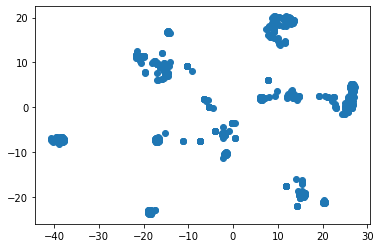

In [208]:
# Then create a scatter plot of the t-SNE output. 
# Observe whether there are distinct clusters or not.
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0],tsne_features[:,1])
plt.show()

In [209]:
# Identify the best number of clusters using the elbow curve
# First calculate the intertia for the range of k values
from sklearn.cluster import KMeans
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\marcu\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,260036.062500
1,2,128225.343750
2,3,88776.929688
3,4,60866.660156
4,5,41375.269531


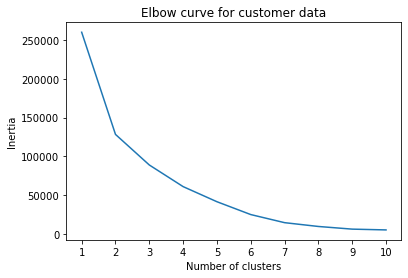

In [210]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [211]:
# Intiialize the K-means model
model = KMeans(n_clusters = 6, random_state = 42)
    
# Train the model
model.fit(tsne_features)

# Predict clusters
predictions = model.predict(tsne_features)

print(predictions)

[4 4 2 3 1 2 3 1 1 1 0 1 5 0 2 5 3 2 4 4 1 2 3 2 2 4 1 1 2 4 2 4 2 3 2 5 1
 3 2 2 2 2 0 4 2 1 2 2 2 4 0 2 3 3 2 2 2 5 2 1 0 2 5 0 5 2 3 2 5 5 4 4 4 2
 2 2 0 3 3 0 3 0 3 3 3 3 3 4 4 2 4 1 2 3 0 3 5 4 2 1 0 0 2 5 5 2 0 2 5 2 0
 2 4 5 2 1 0 1 1 2 4 2 1 2 3 2 3 0 3 1 3 5 3 0 2 2 0 1 5 1 5 5 3 3 5 2 1 5
 3 2 5 3 5 4 0 3 1 2 1 3 0 5 4 0 2 3 3 5 5 5 3 2 0 4 4 4 0 3 0 1 3 4 1 5 3
 3 4 1 4 2 0 3 4 2 5 0 4 3 1 0 0 5 0 5 1 1 0 3 2 3 5 3 0 4 4 3 0 3 5 4 0 4
 4 3 1 4 0 4 4 0 5 2 1 1 4 5 3 4 3 4 1 0 4 2 0 3 1 4 2 1 0 1 3 5 3 2 0 3 1
 0 3 4 4 4 0 3 2 0 3 0 4 5 0 2 0 1 5 1 1 1 1 5 3 5 5 2 5 2 3 3 4 1 5 1 2 1
 0 3 5 3 3 0 2 2 0 2 2 2 2 2 4 4 1 0 0 3 1 5 3 4 1 0 1 4 5 5 5 1 4 5 2 0 4
 0 3 1 1 1 3 0 5 5 1 4 2 1 1 0 0 3 1 4 4 2 3 2 3 1 0 1 2 4 4 0 3 3 1 0 0 4
 2 1 4 1 2 1 1 0 0 0 2 2 3 5 0 3 5 0 0 1 1 2 1 5 4 4 1 0 1 0 0 4 0 3 5 0 1
 0 4 1 1 0 1 0 1 1 1 2 4 0 1 5 1 4 0 2 0 0 0 1 1 3 5 0 5 0 5 0 2 4 1 1 1 2
 0 3 0 0 3 5 0 3 4 0 1 0 1 0 1 3 0 0 1 5 1 1 0 1 2 4 1 5 1 0 4 1 0 4 5 5 3
 3 1 3 3 0 4 2 3 1 4 1 4 

In [212]:
# Add the predicted cluster labels to the original data.
crypto_df["class"] = model.labels_
crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,class
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0.524946,4.489424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
